**IMPORT LIBRARIES**

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

DISPLAY ALL THE DATA

In [111]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

**LOAD DATA**

In [112]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (3).csv


In [113]:
df = pd.read_csv('Titanic-Dataset.csv')

**PREVIEW DATA**

In [114]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Dataset Shape: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


**DATASET INFO**

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**DESCRIPTIVE STATISTICS**

In [118]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**CHECKING MISSING VALUES**

In [119]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**EXPLORATORY DATA ANALYSIS**

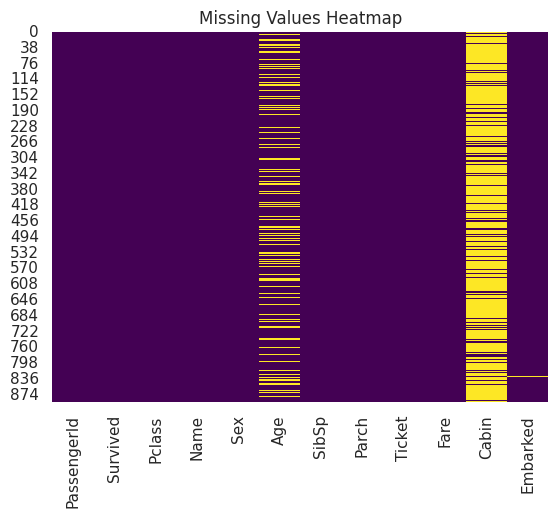

In [120]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

**DISTRIBUTION OF AGE**

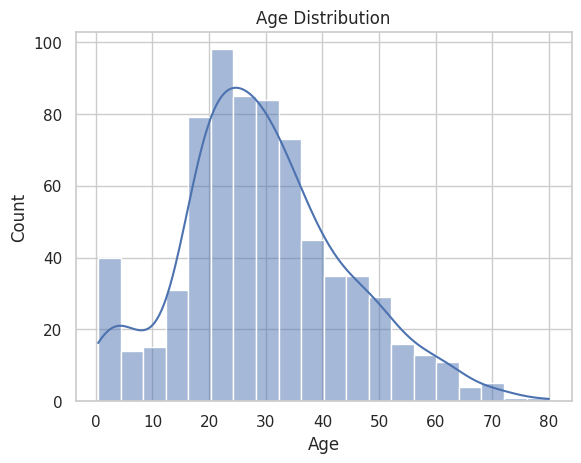

In [121]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

**SURVIVAL COUNT**

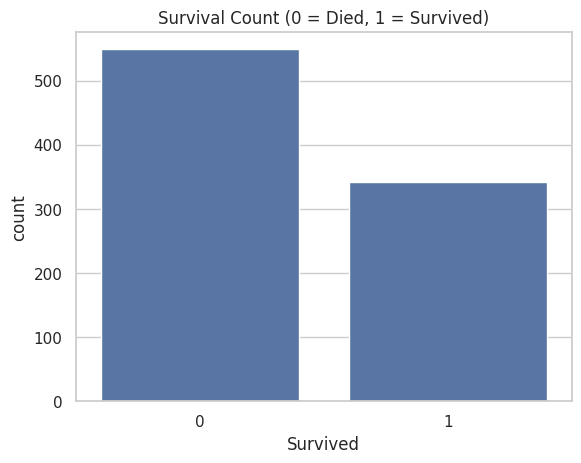

In [122]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

**HANDLING MISSING VALUES**

In [123]:
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

In [124]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [125]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [126]:
df.drop(columns=['Cabin'], inplace=True)

**ENCODING CATEGORICAL VARIABLES**

In [127]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [128]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

**OUTLIERS DETECTION AND REMOVAL**

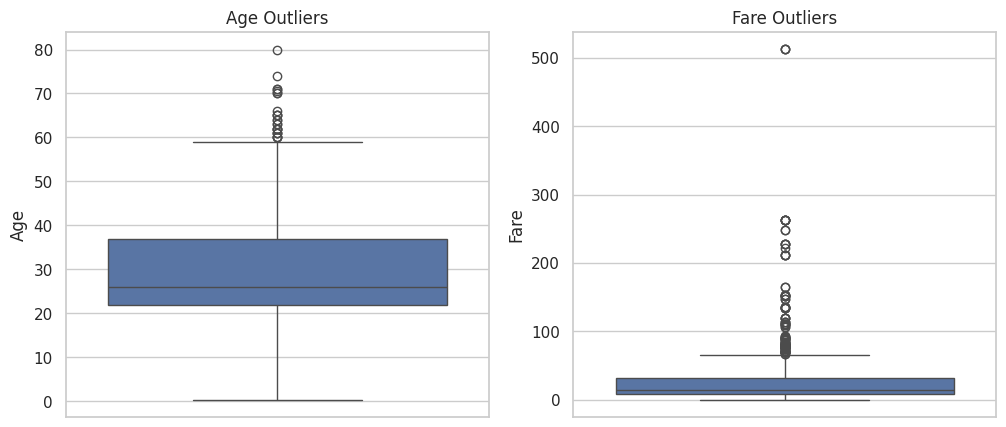

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df['Age'], ax=axes[0])
axes[0].set_title('Age Outliers')
sns.boxplot(y=df['Fare'], ax=axes[1])
axes[1].set_title('Fare Outliers')
plt.show()

In [131]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
df['Fare'] = np.where(df['Fare'] > upper_limit, upper_limit, df['Fare'])  #Caping

**FEATURE SCALING**

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

**DATASET OVERVIEW (FINAL)**

In [134]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(2)
memory usage: 71.5+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.533834,1,0,A/5 21171,-0.820552,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.674891,1,0,PC 17599,2.031623,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.231653,0,0,STON/O2. 3101282,-0.787578,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.448255,1,0,113803,1.419297,False,True
4,5,0,3,"Allen, Mr. William Henry",0,0.448255,0,0,373450,-0.781471,False,True


**FEATURE CORRELATION HEATMAP**

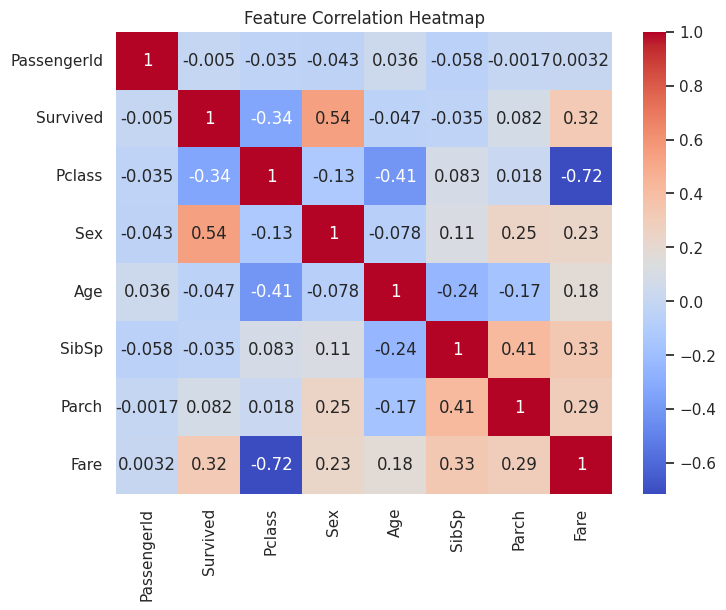

In [135]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

**SAVING CLEANED DATASET**

In [136]:
import os

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [138]:
folder_path = '/content/drive/My Drive/ELEVATELABS/TASK1'
os.makedirs(folder_path, exist_ok=True)

In [140]:
cleaned_save_path = os.path.join(folder_path, 'cleaned_titanic.csv')
df.to_csv(cleaned_save_path, index=False)

print(f'Cleaned dataset saved at: {cleaned_save_path}')

Cleaned dataset saved at: /content/drive/My Drive/ELEVATELABS/TASK1/cleaned_titanic.csv
